<function matplotlib.pyplot.show(*args, **kw)>

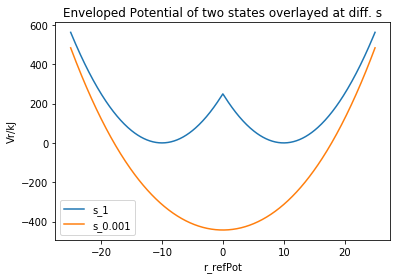

In [1]:
import os, sys
sys.path.append(os.chdir(os.getcwd()+"/.."))

# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
from matplotlib import pyplot as plt
%matplotlib inline
##Construct potential
s=1
s2=0.001
Eoffs=(0, 0)
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
energies = eds_pot.ene(positions)
eds_pot.s = s2
energies2 = eds_pot.ene(positions)
#print(len(positions), len(energies))

##EXAMPLE PLOT
plt.plot(positions, energies, label="s_"+str(s))
plt.plot(positions, energies2, label="s_"+str(s2))
plt.ylabel("Vr/kJ")
plt.xlabel("r_refPot")
plt.title("Enveloped Potential of two states overlayed at diff. s")
plt.legend()
plt.show

No handles with labels found to put in legend.


(0, 400)

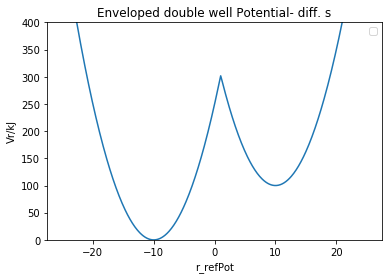

In [4]:
#enveloped double well potential example
##Imports:
import src.potential1D as pot
from matplotlib import pyplot as plt
%matplotlib inline

##Construct potential
doubel_well = pot.envelopedDoubleWellPotential(x_shifts=[-10,10],
                                               y_shifts=[0,-100], fcs=[5,5])

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
energies = doubel_well.ene(positions)

##Plot
plt.plot(positions, energies)
plt.ylabel("Vr/kJ")
plt.xlabel("r_refPot")
plt.title("Enveloped double well Potential- diff. s")
plt.legend()
plt.ylim((0,400))

In [10]:
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
import visualisation.plotPotentials as exPlot

%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 0)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
V_is = [pot.flat_well([-15,-8]), pot.flat_well([8,15])]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s1,
                                      title="Enveloped Potential System s="+str(s1))

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2))

ModuleNotFoundError: No module named 'visualisation'

In [6]:
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 0)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s1,
                                      title="Enveloped Potential System s="+str(s1))

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2))

ModuleNotFoundError: No module named 'plots'

In [7]:

# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import numpy as np
import src.potential1D as pot
import plots.plotPotentials as exPlot
import matplotlib.pyplot as plt #remove
%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 0)
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
s_values= np.logspace(0, -3.5,num=8)

##def
def envPot_diffS_2stateMap_compare(eds_potential:pot.envelopedPotential, s_values:list, positions:list,
                         V_max:float=500, V_min:float=None,title:str=None, out_path:str=None):
    ##row/column ratio
    per_row =4
    n_rows = (len(s_values)//per_row)+1 if ((len(s_values)%per_row)>0) else (len(s_values)//per_row)

    ##plot
    fig, axes = plt.subplots(nrows=n_rows, ncols=per_row, figsize=(20,10))
    axes = [ax for ax_row in axes for ax in ax_row]
    first = True
    for ax, s in zip( axes, s_values):
        eds_potential.s=s
        min_e = 0
        energy_map = []
        for x in positions:
            row = eds_potential.ene([[x for i in positions], positions])
            row_cut = list(map(lambda x:  V_max if(V_max != None and x > V_max) else x, row))
            energy_map.append(row_cut)
            if(min(row)< min_e):
                min_e=min(row)
        if(V_min==None and first):
            V_min=min_e
            first=False
            print("emin: ", min_e)

        #plot phase space surface
        surf = ax.imshow(energy_map, cmap="viridis", interpolation="nearest",
                         origin='center', extent=[ min(positions), max(positions), min(positions), max(positions)],
                         vmax=V_max, vmin=V_min)
        ax.set_xlabel("$r_1$")
        ax.set_ylabel("$r_2$")
        ax.set_title("complete phaseSpace of $state_R$")
    fig.colorbar(surf, aspect=10, label='Energy/kJ')

    ##optionals
    if(title):    fig.suptitle(title)
    if(out_path): fig.savefig(out_path)
    fig.show()

    return fig, axes
    
##PLOT
envPot_diffS_2stateMap_compare(eds_pot, s_values, positions)


ModuleNotFoundError: No module named 'plots'

In [ ]:
#More copmlex example - 2 states one harmonicPot other one a doubleWellpot - SystemPlot
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline

##Construct potential
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[3,3])
harm_pot = pot.harmonicOsc1D(x_shift=15, fc=5)
###enveloping potential
V_is = [double_well, harm_pot]
s1=1
s2=0.0005
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##PARAMETERS
positions = [x / float(10) for x in range(-500, 501)]

#plot:
exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, 
                                      title="Enveloped Potential System s="+str(s1), y_range=(0,1000))
exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2),  y_range=(-1200,1000))

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s1,
                                      title="Enveloped Potential System s="+str(s1))

exPlot.plot_envelopedPotential_2State_System(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2))

In [ ]:
#More copmlex example - 2 states one harmonicPot other one a doubleWellpot - GridPlot different s_vals
##Imports:
import numpy as np
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
###States
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[3,3])
harm_pot = pot.harmonicOsc1D(x_shift=15, fc=5)
###enveloping potential
V_is = [double_well, harm_pot]
s=1.0
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-500, 501)]
s_values= np.logspace(0, -5,num=8)

##Plot
exPlot.envPot_diffS_compare(eds_potential=eds_pot, s_values=s_values, positions=positions)

In [ ]:
#Simple example - 2 states two harmonicPotentials - GridPlot different s_vals
##Imports:
import numpy as np
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
###enveloping potential
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]    #2 states_harm pot
s=1.0   #dummy s
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
s_values= np.logspace(0, -3,num=16)

##Plot
exPlot.envPot_diffS_compare(eds_potential=eds_pot, s_values=s_values, positions=positions)

In [ ]:
#Simple example - 2 states two harmonicPotentials - Overlay Plot different s
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline

##Construct potential
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)


##Parameters
svals= np.logspace(0, -3,num=100)
less_svals= np.logspace(0, -3,num=15)
positions = [x / float(10) for x in range(-500, 501)]

##Plot
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True, y_range=(-500, 500))

In [ ]:

#More complex example - 2 states one harmonicPot other one a doubleWellpot - Overlay Plot different s 
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline

##Construct potential
###System-End states
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[5,5])
harm_pot = pot.harmonicOsc1D(x_shift=15, fc=5)
###Enveloping Potential
V_is = [double_well, harm_pot]
s=1
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
svals= np.logspace(0, -3.5,num=100)
less_svals= np.logspace(0, -4,num=15)
positions = [x / float(10) for x in range(-500, 501)]

##Plot
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True, y_range=(-2000, 500))
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-400,500), hide_legend=True)

In [ ]:

#More complex example - 2 states two doubleWellPotentials - Overlay Plot different s
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline
##Potential
###states
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[3,3])
double_well2 = pot.envelopedDoubleWellPotential(x_shifts=[30,10], y_shifts=[-50,0], fcs=[3,5])

###enveloping potential
V_is = [double_well, double_well2]
s=1
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
svals= np.logspace(0, -3.5,num=100)
less_svals= np.logspace(0, -4,num=15)
positions = [x / float(10) for x in range(-500, 501)]

##Plot
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True, y_range=(-2000, 500))
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-2000,300), hide_legend=True)

In [ ]:

#Simple example - 2 states two harmonicPotentials - Overlay Plot different s aligned to Zero
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline

##Construct potential
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOsc1D(x_shift=10, fc=5), pot.harmonicOsc1D(x_shift=-10, fc=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters:
svals= np.logspace(0, -5,num=100)
less_svals= np.logspace(0, -5,num=10)
positions = [x / float(10) for x in range(-250, 251)]

##plot: 
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(0,500), hide_legend=True)

In [ ]:
#More complex example - 2 states one harmonicPot other one a doubleWellpot - Overlay Plot different s aligned to Zero
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline

##Construct potential
###System-End states
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[3,3])
harm_pot = pot.harmonicOsc1D(x_shift=15, fc=5)
###Enveloping Potential
V_is = [double_well, harm_pot]
s=1
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
svals= np.logspace(0, -5,num=100)
less_svals= np.logspace(0, -5,num=15)
positions = [x / float(10) for x in range(-500, 501)]

##Plot
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(0,500), hide_legend=True)

In [ ]:
#More complex example - 2 states two doubleWellPotentials - Overlay Plot different s aligned to Zero
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
import numpy as np
%matplotlib inline
##Potential
###states
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-30,-10], y_shifts=[0,-30], fcs=[3,3])
double_well2 = pot.envelopedDoubleWellPotential(x_shifts=[30,10], y_shifts=[-50,0], fcs=[3,5])

###enveloping potential
V_is = [double_well, double_well2]
s=1
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##Parameters
svals= np.logspace(0, -5,num=100)
less_svals= np.logspace(0, -5,num=15)
positions = [x / float(10) for x in range(-500, 501)]

##Plot
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(0,500), hide_legend=True)

In [1]:

#SuperMore complex example - 3 states  harmonicPot - 
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, -100, -200)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
V_is=[pot.harmonicOsc1D(x_shift=10, fc=10), pot.harmonicOsc1D(x_shift=-10, fc=10), pot.harmonicOsc1D(x_shift=0, fc=10),]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
svals= np.logspace(0, -5,num=100)

exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s1,
                                      title="Enveloped Potential System s="+str(s1), y_range=[0,500])

exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2), y_range=[-800,500])

exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(0,500), hide_legend=True)

ModuleNotFoundError: No module named 'src'

In [ ]:

#SuperMore complex example - 3 states  harmonicPot - 
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 0, 0)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
V_is=[pot.harmonicOsc1D(x_shift=10, fc=10), pot.harmonicOsc1D(x_shift=-10, fc=10), pot.harmonicOsc1D(x_shift=0, fc=10),]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-250, 251)]
svals= np.logspace(0, -5,num=100)

exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s1,
                                      title="Enveloped Potential System s="+str(s1), y_range=[0,500])

exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s2,
                                      title="Enveloped Potential System s="+str(s2), y_range=[-800,500])

exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True)
exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(0,500), hide_legend=True)

In [2]:
### SuperMore complex example - 3 states  harmonicPot - 
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import src.potential1D as pot
import plots.plotPotentials as exPlot
%matplotlib inline
##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 50, -50, 100, -100)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
fc=20
V_is=[pot.harmonicOsc1D(x_shift=-20, fc=fc), pot.harmonicOsc1D(x_shift=20, fc=fc),
      pot.harmonicOsc1D(x_shift=10, fc=fc), pot.harmonicOsc1D(x_shift=-10, fc=fc), pot.harmonicOsc1D(x_shift=0, fc=fc)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = [x / float(10) for x in range(-300, 301)]
svals=np.logspace(0, -3, 40)

#exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s1,
#                                      title="Enveloped Potential System s="+str(s1), y_range=[0,500])

#exPlot.plot_envelopedPotential_system(eds_potential=eds_pot, positions=positions, s_value=s2,
#                                      title="Enveloped Potential System s="+str(s2), y_range=[-800,500])

#exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
#                                           hide_legend=True)
#exPlot.envPot_differentS_overlay_min0_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
#                                           y_range=(0,500), hide_legend=True)

exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)

Eoffs=(0, 0, 0, 0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)

ModuleNotFoundError: No module named 'src'